In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# making dfs of all files
lpi_df = pd.read_csv("global-living-planet-index.csv")
rli_df = pd.read_csv("red-list-index.csv")
ptbs_df = pd.read_csv("protected-terrestrial-biodiversity-sites.csv")

In [6]:
# making dictionary out of ipbes regions csv file 
dict_df = pd.read_csv("ipbes_regions_subregions_1.1.csv")

# using dictionary comprehension by zipping list of country codes with list of country regions
# so region dct connects country code to it's ipbes region
region_dct = {code : region for (code, region) in zip(dict_df["GID_0"].tolist(), dict_df["Region"].tolist())}

In [14]:
""" # I first tried to use country name in the dictionary and area, but country code is standardized
rli_df["Region"] = rli_df["Code"].map(region_dct)
ptbs_df["Region"] = ptbs_df["Code"].map(region_dct)

# checking the null values after mapping to see if any countries were missed
print(ptbs_df[ptbs_df["Region"].isna()]["Entity"].unique(), 
rli_df[rli_df["Region"].isna()]["Entity"].unique())"""


# this (above) was my original code, but it was mapping incorrect values ot the null code values so I had to initialize the regions 
# as null so that it wouldn't map weirdly
rli_df["Region"] = np.nan
ptbs_df["Region"] = np.nan

# apply mapping only to non-null code values
rli_df.loc[rli_df["Code"].notna(), "Region"] = rli_df["Code"].map(region_dct)
ptbs_df.loc[ptbs_df["Code"].notna(), "Region"] = ptbs_df["Code"].map(region_dct)

# adding a region column to living planet index df so they're the same, and adding it in as "americas" 
# instead of separately to be the same as the other two
lpi_df["Region"] = lpi_df["Entity"].apply(lambda x: "Americas" if x in ["North America", "Latin America and the Caribbean"] else x)

In [26]:
# looking for only overlapping years
print(lpi_df['Year'].unique())
print(ptbs_df['Year'].unique())
print(rli_df['Year'].unique())

# function that will filter each df to only apply the years that each of them have data for
# not applying this just yet because I don't want to edit the data until I'm using it
def overlapping_years(df):
    df = df[df['Year'].between(2000,2020)]
    return df

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


##### COMPARING LIVING PLANET INDEX WITH REGIONS TO RED LIST INDEX

In [8]:
# making custom palettes to ensure that region line colors are standardized across both plots
lpi_palette = {
    "Africa": "cornflowerblue",
    "Americas": "green",
    "Europe and Central Asia": "red",
    "Asia and Pacific": "orange"
}
rli_palette = {
    "Africa": "cornflowerblue",
    "Americas": "green",
    "Europe and Central Asia": "red",
    "Asia and the Pacific": "orange"
}


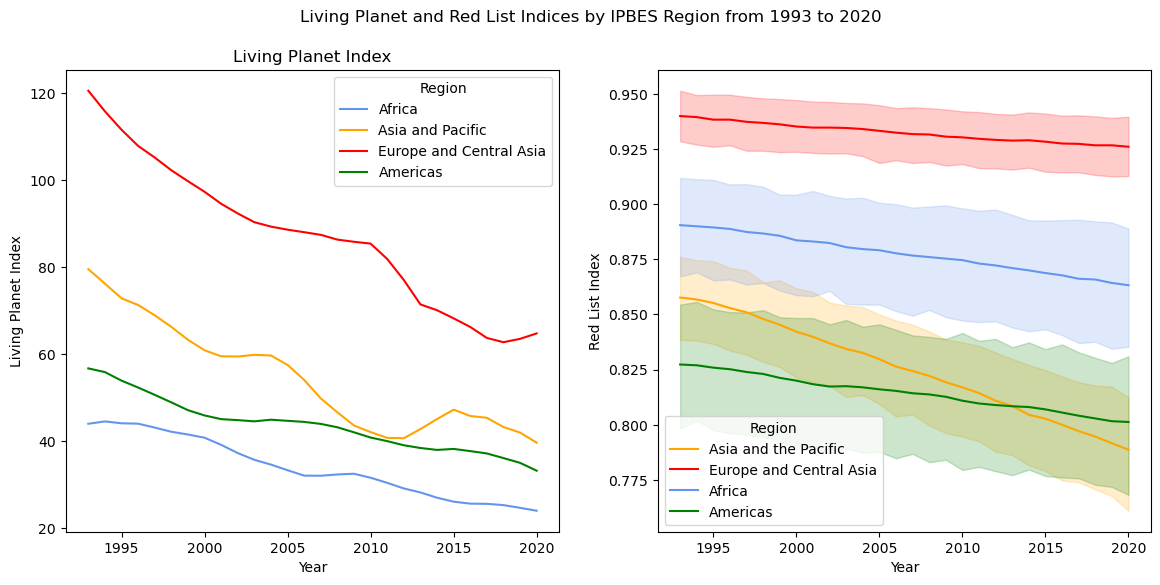

In [28]:
# filtering living planet index and red list index to only show the years that both have data on
filtered_lpi_df = lpi_df[lpi_df["Year"] >= 1993]
filtered_rli_df = rli_df[rli_df["Year"] <= 2020]

# initializing figure so I can make the two plots next to each other
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

sns.lineplot(x='Year', y='Living Planet Index', 
             data=filtered_lpi_df[filtered_lpi_df["Region"].isin(["Africa", "Americas", "Europe and Central Asia", "Asia and Pacific"])], 
             hue='Region', errorbar=None, palette=lpi_palette, ax=axes[0])
axes[0].set_title("Living Planet Index")

sns.lineplot(x='Year', y="15.5.1 - Red List Index - ER_RSK_LST", hue="Region", 
             data = filtered_rli_df[filtered_rli_df["Region"].notna()], palette=rli_palette, ax=axes[1])
axes[1].set_ylabel("Red List Index")
plt.suptitle("Living Planet and Red List Indices by IPBES Region from 1993 to 2020")
plt.show()

In [18]:
lpi_df.head()

,Entity,Code,Year,Living Planet Index,Upper confidence interval of Living Planet Index,Lower confidence interval of Living Planet Index,Region
0,Africa,NaN,1970,100.000000,100.00000,100.000000,Africa
1,Africa,NaN,1971,94.004613,103.67786,86.478470,Africa
2,Africa,NaN,1972,89.996994,105.99841,77.636576,Africa
3,Africa,NaN,1973,89.674807,109.67456,74.525344,Africa
4,Africa,NaN,1974,85.613140,109.10656,67.872155,Africa


In [17]:
rli_df.head()

,Entity,Code,Year,15.5.1 - Red List Index - ER_RSK_LST,Region
0,Afghanistan,AFG,1993,0.93,Asia and the Pacific
1,Afghanistan,AFG,1994,0.93,Asia and the Pacific
2,Afghanistan,AFG,1995,0.93,Asia and the Pacific
3,Afghanistan,AFG,1996,0.93,Asia and the Pacific
4,Afghanistan,AFG,1997,0.93,Asia and the Pacific


In [16]:
ptbs_df.head()

,Entity,Code,Year,15.1.2 - Average proportion of Terrestrial Key Biodiversity Areas (KBAs) covered by protected areas (%) - ER_PTD_TERR,Region
0,Afghanistan,AFG,2000,0.0,Asia and the Pacific
1,Afghanistan,AFG,2001,0.0,Asia and the Pacific
2,Afghanistan,AFG,2002,0.0,Asia and the Pacific
3,Afghanistan,AFG,2003,0.0,Asia and the Pacific
4,Afghanistan,AFG,2004,0.0,Asia and the Pacific
